In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df=pd.read_csv("/content/Dataset.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [23]:
df.shape

(394, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [18]:
df = df.dropna()

In [19]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [21]:
Q1 = df['LSTAT'].quantile(0.25)
Q3 = df['LSTAT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['LSTAT'] < lower_bound) | (df['LSTAT'] > Upper_bound)]
print(outliers)

         CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
141   1.62864  0.0  21.89   0.0  0.624  5.019  100.0  1.4394    4  437   
373  11.10810  0.0  18.10   0.0  0.668  4.906  100.0  1.1742   24  666   
374  18.49820  0.0  18.10   0.0  0.668  4.138  100.0  1.1370   24  666   
412  18.81100  0.0  18.10   0.0  0.597  4.628  100.0  1.5539   24  666   
414  45.74610  0.0  18.10   0.0  0.693  4.519  100.0  1.6582   24  666   
438  13.67810  0.0  18.10   0.0  0.740  5.935   87.9  1.8206   24  666   

     PTRATIO       B  LSTAT  MEDV  
141     21.2  396.90  34.41  14.4  
373     20.2  396.90  34.77  13.8  
374     20.2  396.90  37.97  13.8  
412     20.2   28.79  34.37  17.9  
414     20.2   88.27  36.98   7.0  
438     20.2   68.95  34.02   8.4  


In [29]:
Q1 = df['ZN'].quantile(0.5)
Q3 = df['ZN'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['ZN'] < lower_bound) | (df['ZN'] > Upper_bound)]
print(outliers)

        CRIM     ZN  INDUS  CHAS     NOX     RM   AGE      DIS  RAD  TAX  \
39   0.02763   75.0   2.95   0.0  0.4280  6.595  21.8   5.4011    3  252   
40   0.03359   75.0   2.95   0.0  0.4280  7.024  15.8   5.4011    3  252   
54   0.01360   75.0   4.00   0.0  0.4100  5.888  47.6   7.3197    3  469   
55   0.01311   90.0   1.22   0.0  0.4030  7.249  21.9   8.6966    5  226   
56   0.02055   85.0   0.74   0.0  0.4100  6.383  35.7   9.1876    2  313   
57   0.01432  100.0   1.32   0.0  0.4110  6.816  40.5   8.3248    5  256   
65   0.03584   80.0   3.37   0.0  0.3980  6.290  17.8   6.6115    4  337   
66   0.04379   80.0   3.37   0.0  0.3980  5.787  31.1   6.6115    4  337   
187  0.07875   45.0   3.44   0.0  0.4370  6.782  41.1   3.7886    5  398   
188  0.12579   45.0   3.44   0.0  0.4370  6.556  29.1   4.5667    5  398   
189  0.08370   45.0   3.44   0.0  0.4370  7.185  38.9   4.5667    5  398   
190  0.09068   45.0   3.44   0.0  0.4370  6.951  21.5   6.4798    5  398   
194  0.01439

In [28]:
Q1 = df['B'].quantile(0.5)
Q3 = df['B'].quantile(1)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['B'] < lower_bound) | (df['B'] > Upper_bound)]
print(outliers)

         CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
18    0.80271  0.0   8.14   0.0  0.538  5.456  36.6  3.7965    4  307   
20    1.25179  0.0   8.14   0.0  0.538  5.570  98.1  3.7979    4  307   
25    0.84054  0.0   8.14   0.0  0.538  5.599  85.7  4.4546    4  307   
26    0.67191  0.0   8.14   0.0  0.538  5.813  90.3  4.6820    4  307   
27    0.95577  0.0   8.14   0.0  0.538  6.047  88.8  4.4534    4  307   
..        ...  ...    ...   ...    ...    ...   ...     ...  ...  ...   
477  15.02340  0.0  18.10   0.0  0.614  5.304  97.3  2.1007   24  666   
478  10.23300  0.0  18.10   0.0  0.614  6.185  96.7  2.1705   24  666   
484   2.37857  0.0  18.10   0.0  0.583  5.871  41.9  3.7240   24  666   
489   0.18337  0.0  27.74   0.0  0.609  5.414  98.3  1.7554    4  711   
490   0.20746  0.0  27.74   0.0  0.609  5.093  98.0  1.8226    4  711   

     PTRATIO       B  LSTAT  MEDV  
18      21.0  288.99  11.69  20.2  
20      21.0  376.57  21.02  13.6  
25      21.0  3

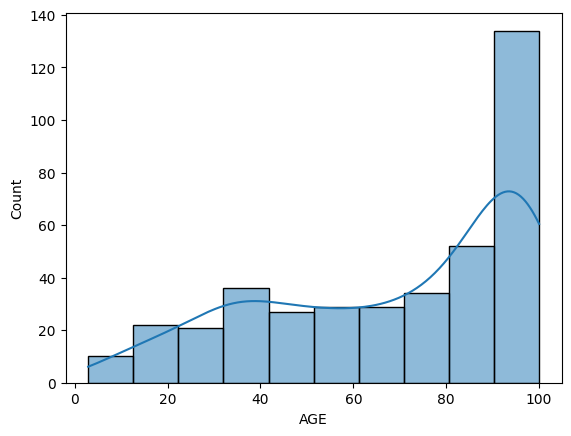

In [30]:
sns.histplot(data=df, x="AGE", kde=True)
plt.show()

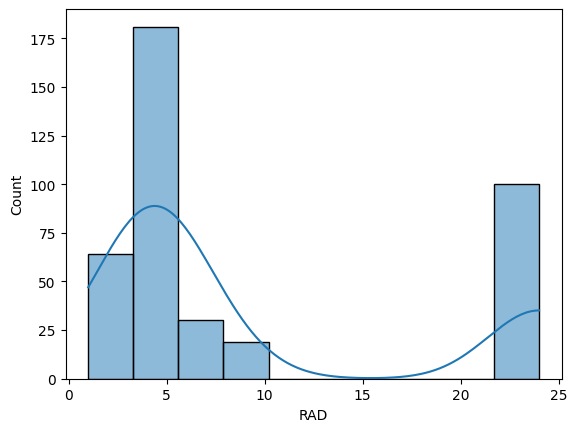

In [31]:
sns.histplot(data=df, x="RAD", kde=True)
plt.show()

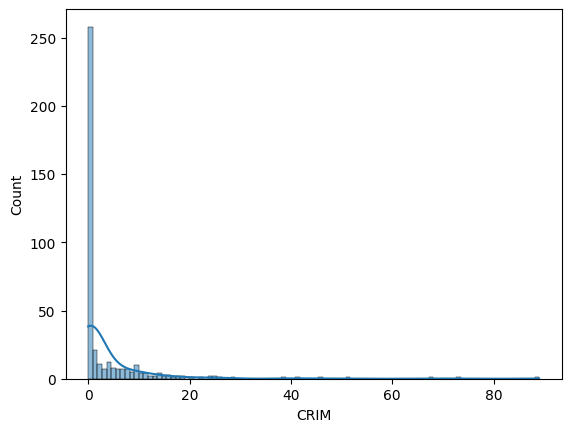

In [33]:
sns.histplot(data=df, x="CRIM",kde=True)
plt.show()

<Axes: >

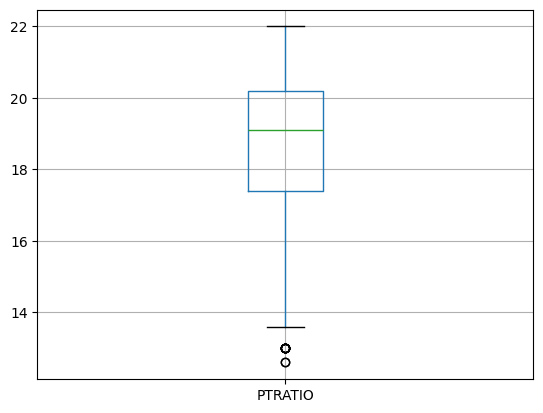

In [35]:
df.boxplot( column =['PTRATIO'], grid = True)

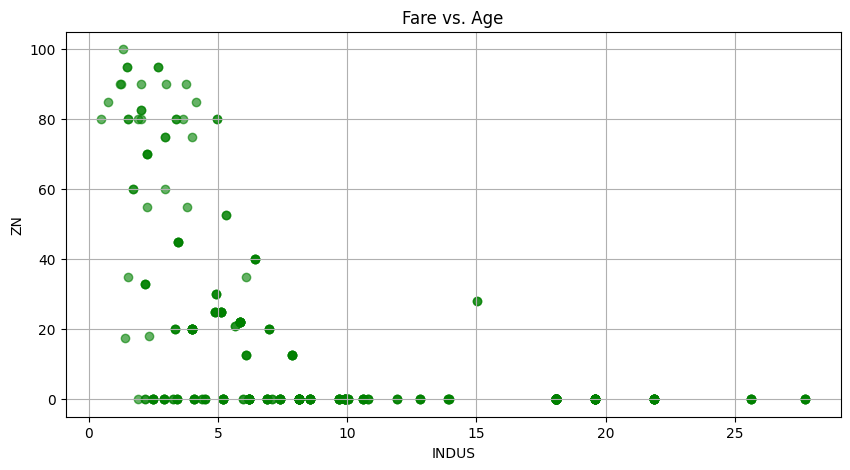

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(df['INDUS'], df['ZN'], color='green', alpha=0.6)
plt.title('Fare vs. Age')
plt.xlabel('INDUS')
plt.ylabel('ZN')
plt.grid(True)
plt.show()

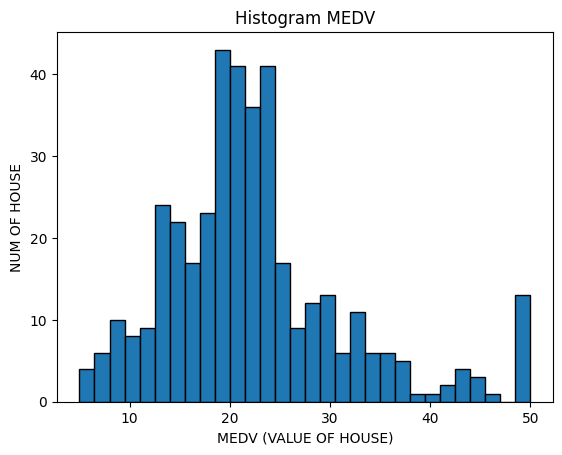

In [37]:
plt.hist(df['MEDV'], bins=30, edgecolor='black')
plt.xlabel('MEDV (VALUE OF HOUSE)')
plt.ylabel('NUM OF HOUSE')
plt.title('Histogram MEDV')
plt.show()

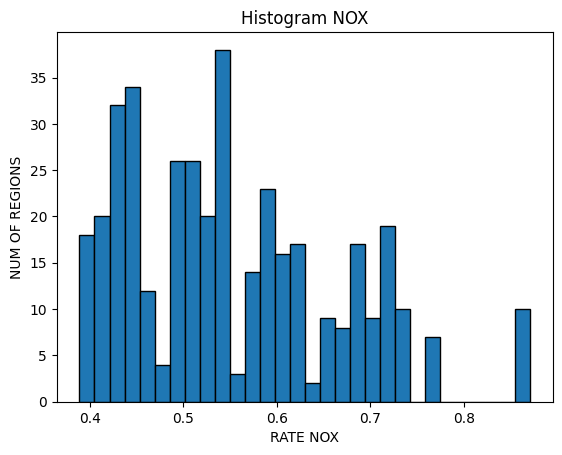

In [38]:
plt.hist(df['NOX'], bins=30, edgecolor='black')
plt.xlabel('RATE NOX')
plt.ylabel('NUM OF REGIONS')
plt.title('Histogram NOX')
plt.show()

In [41]:
from sklearn.linear_model import LinearRegression
x =df.drop('MEDV', axis=1)
y = df['MEDV']

model = LinearRegression()
model.fit(x, y)
y_prediction = model.predict(x)
print(y_prediction[:11])

[29.4365956  24.76875917 30.39800878 28.45203573 24.88517936 19.76793033
 12.53535129 19.49062691 21.33216594 21.42676539 19.24505469]


In [42]:
from sklearn.linear_model import LinearRegression
x =df.drop('AGE', axis=1)
y = df['AGE']

model = LinearRegression()
model.fit(x, y)
y_prediction = model.predict(x)
print(y_prediction[:15])

[58.83261536 57.2645401  54.99674239 46.06330499 44.98759858 62.69994594
 72.62286369 66.11041135 54.17275298 59.18503474 60.28735931 60.6173871
 58.46719051 70.93717808 63.2552043 ]
